In [1]:
import sys
import os

# Ajouter le chemin du répertoire parent de cifar10_classification
project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)
print(project_path)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar


In [2]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from cifar10_classification.dataset import prepare_data
from cifar10_classification.features import extract_hog_features, flatten_images, save_processed_data
from cifar10_classification.modeling.train import train_classifier
from cifar10_classification.plots import plot_sample_images, plot_confusion_matrix, display_hog_images
from sklearn.metrics import confusion_matrix

In [3]:

# Vérifiez si le chemin est bien ajouté
print(sys.path)

['/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar/notebooks', '/home/mkbrad7/anaconda3/lib/python311.zip', '/home/mkbrad7/anaconda3/lib/python3.11', '/home/mkbrad7/anaconda3/lib/python3.11/lib-dynload', '', '/home/mkbrad7/anaconda3/lib/python3.11/site-packages', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar', '/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar']


In [4]:
from cifar10_classification.config import BASE_DIR, DATA_DIR
print(BASE_DIR)
print(DATA_DIR)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar
/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar/cifar-10-batches-py


Nombre d'images d'entraînement: 50000
Nombre d'images de test: 10000
Taille d'une image: 32x32 pixels
Nombre de canaux par image: 3


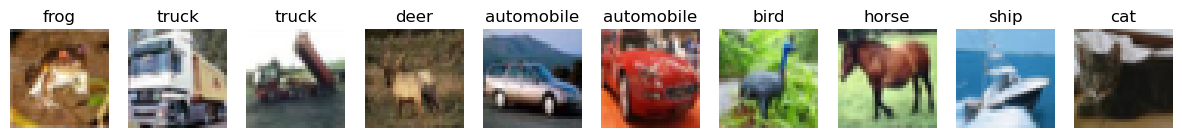

In [5]:
# Importer les bibliothèques nécessaires
from cifar10_classification.dataset import load_cifar10, unpickle
from cifar10_classification.config import DATA_DIR as data_dir, LABEL_NAMES
from cifar10_classification.plots import plot_sample_images, show_images
import os


# Charger les données
(X_train, y_train), (X_test, y_test) = load_cifar10(data_dir)

# Afficher les détails des données
print(f"Nombre d'images d'entraînement: {X_train.shape[0]}")
print(f"Nombre d'images de test: {X_test.shape[0]}")
print(f"Taille d'une image: {32}x{32} pixels")
print(f"Nombre de canaux par image: {3}")

# Afficher quelques images pour visualiser les données
label_names = unpickle(os.path.join(data_dir, 'batches.meta'))[b'label_names']
label_names = [label.decode('utf-8') for label in label_names]

plot_sample_images(X_train, y_train, label_names)


In [6]:
# Préparer les données
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data()

In [7]:
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
    
print(f"Number of classes: {len(LABEL_NAMES)}")

Training data shape: (40000, 3072)
Validation data shape: (10000, 3072)
Test data shape: (10000, 3072)
Number of classes: 10


In [8]:
# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Class distribution in training data: {class_distribution}")

Class distribution in training data: {0: 4027, 1: 4021, 2: 3970, 3: 3977, 4: 4067, 5: 3985, 6: 4004, 7: 4006, 8: 3983, 9: 3960}


In [9]:
# Extraire les caractéristiques HOG
X_train_hog, X_train_hog_images = extract_hog_features(X_train, visualize=True)
X_val_hog, X_val_hog_images = extract_hog_features(X_val, visualize=True)
X_test_hog, X_test_hog_images = extract_hog_features(X_test, visualize=True)
# Aplatir les images
X_train_flat = flatten_images(X_train)
X_val_flat = flatten_images(X_val)

In [10]:
# Enregistrer les données traitées
save_processed_data(X_train_hog, X_val_hog, X_test_hog, 'hog')

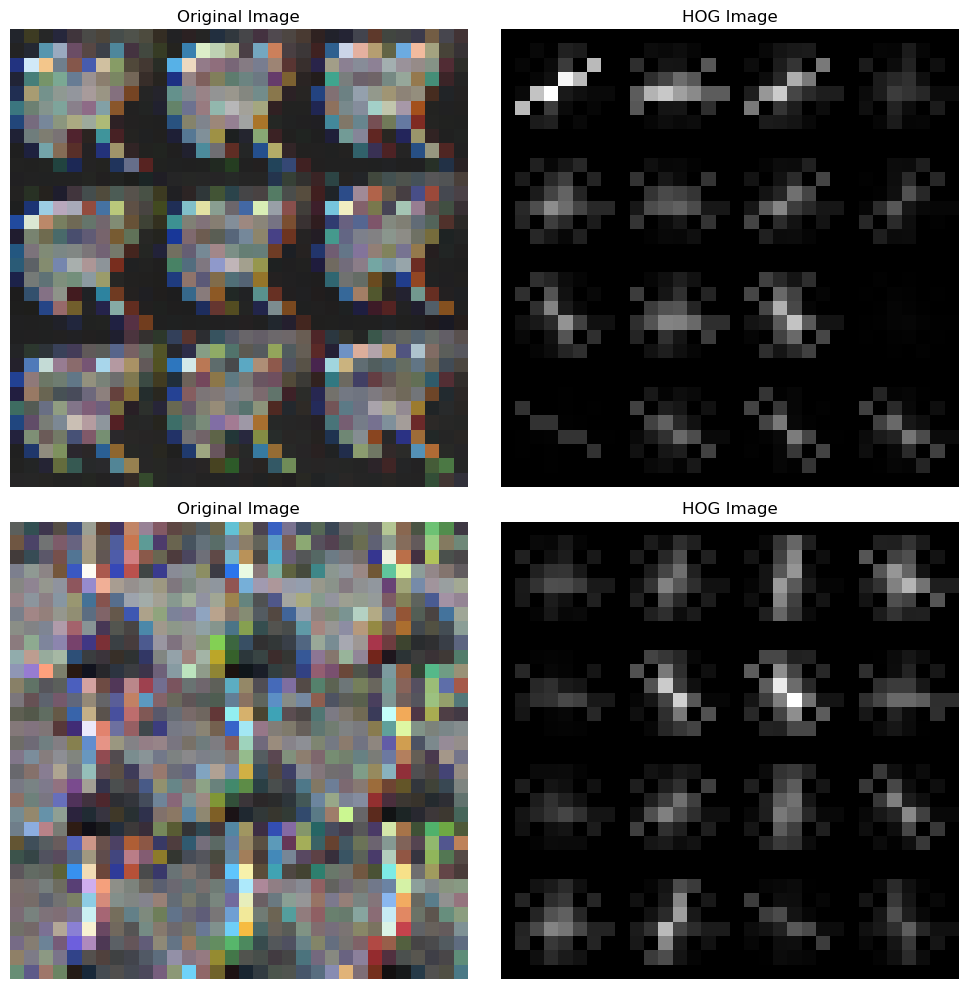

In [11]:
display_hog_images(X_train, X_train_hog_images, 'train', 2)

In [12]:
model_hog, val_hog_pred = train_classifier(X_train_hog, y_train, X_val_hog, y_val, model_type='logistic')


In [13]:
model_flat, val_flat_pred = train_classifier(X_train_flat, y_train, X_val_flat, y_val, model_type='logistic')

Confusion matrix, without normalization
[[569  33  77  17  40   7  17  20 162  31]
 [ 35 632  14  11  27   6  25  24  82 123]
 [116  27 379  68 112 114  96  56  35  27]
 [ 40  41  94 279 112 163 133  98  21  42]
 [ 41  37  62  63 409  42 116  99  23  41]
 [ 14  22  95 117  86 449  91 103  12  26]
 [ 29  38  53  41  86  57 639  28  16   9]
 [ 20  11  56  49 124  88  25 563  22  36]
 [142 112  33  15  15   4  19  21 562  94]
 [ 24 111  12  27  49  15  16  56  81 649]]


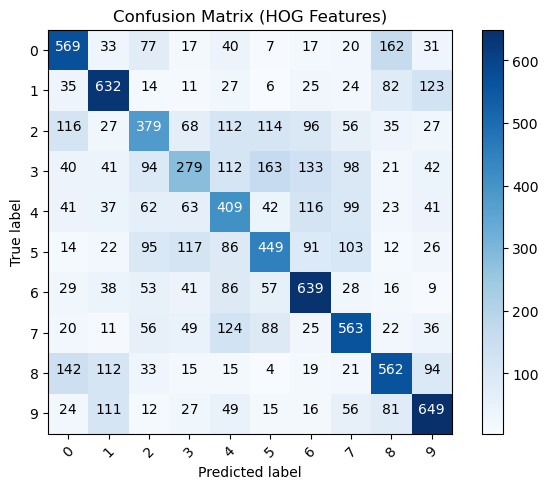

Confusion matrix, without normalization
[[448  69  33  50  27  41  19  63 153  70]
 [ 62 437  26  36  33  46  43  36  89 171]
 [101  37 272  96 146  84 123  97  45  29]
 [ 48  66  95 252  77 223 122  44  52  44]
 [ 57  25 126  68 273  91 135  99  33  26]
 [ 49  46 100 188 109 294  99  58  41  31]
 [ 21  35  65 138 126  89 417  49  15  41]
 [ 44  32  75  76 115  80  49 406  41  76]
 [182  78  25  54  18  40  12  17 490 101]
 [ 96 172  26  24  26  34  50  51 109 452]]


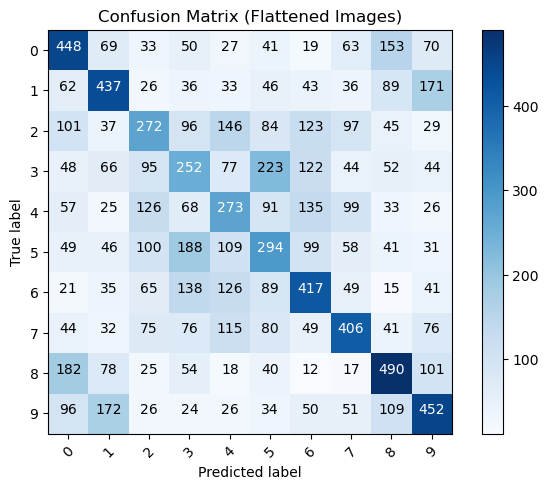

In [14]:
# Matrices de confusion
cm_hog = confusion_matrix(y_val, val_hog_pred)
cm_flat = confusion_matrix(y_val, val_flat_pred)

# Afficher les matrices de confusion
plot_confusion_matrix(cm_hog, classes=[str(i) for i in range(10)], title='Confusion Matrix (HOG Features)')
plot_confusion_matrix(cm_flat, classes=[str(i) for i in range(10)], title='Confusion Matrix (Flattened Images)')